In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [2]:
# Files to Load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
city_data_df= pd.read_csv(city_data_to_load)
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [4]:
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12


In [5]:
pyber_data_complete_df = pd.merge(city_data_df, ride_data_df, how="left", on=["city", "city"])

pyber_data_complete_df.head(5)

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2/24/2019 8:40,13.93,5.628550e+12
1,Richardfort,38,Urban,2/13/2019 12:46,14.00,9.100500e+11
2,Richardfort,38,Urban,2/16/2019 13:52,17.92,8.206390e+11
3,Richardfort,38,Urban,2/1/2019 20:18,10.26,9.554940e+12
4,Richardfort,38,Urban,4/17/2019 2:26,23.00,7.200210e+11


In [6]:
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [7]:
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [8]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [9]:
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [10]:
sum(city_data_df["type"]=="Urban")

66

In [11]:
sum(city_data_df["type"]=="Suburban")

36

In [12]:
sum(city_data_df["type"]=="Rural")

18

In [13]:
ride_data_df.count()


city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [14]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [15]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id    float64
dtype: object

In [16]:
urban_cities_df = pyber_data_complete_df[pyber_data_complete_df["type"] == "Urban"]
urban_cities_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2/24/2019 8:40,13.93,5.628550e+12
1,Richardfort,38,Urban,2/13/2019 12:46,14.00,9.100500e+11
2,Richardfort,38,Urban,2/16/2019 13:52,17.92,8.206390e+11
3,Richardfort,38,Urban,2/1/2019 20:18,10.26,9.554940e+12
4,Richardfort,38,Urban,4/17/2019 2:26,23.00,7.200210e+11


In [17]:
suburban_cities_df = pyber_data_complete_df[pyber_data_complete_df["type"] == "Suburban"]
suburban_cities_df.head()

,city,driver_count,type,date,fare,ride_id
1625,Port Shane,7,Suburban,4/9/2019 15:34,27.66,4.022340e+12
1626,Port Shane,7,Suburban,4/23/2019 16:05,42.26,8.341980e+12
1627,Port Shane,7,Suburban,3/2/2019 12:06,14.95,2.803200e+12
1628,Port Shane,7,Suburban,3/26/2019 4:33,19.03,6.010400e+12
1629,Port Shane,7,Suburban,3/15/2019 12:09,31.58,2.552980e+12


In [18]:
rural_cities_df = pyber_data_complete_df[pyber_data_complete_df["type"] == "Rural"]
rural_cities_df.head()

,city,driver_count,type,date,fare,ride_id
2250,South Jennifer,7,Rural,4/1/2019 9:32,21.63,9.135980e+12
2251,South Jennifer,7,Rural,3/7/2019 19:10,48.79,9.730630e+12
2252,South Jennifer,7,Rural,4/5/2019 14:35,32.20,6.839840e+11
2253,South Jennifer,7,Rural,4/2/2019 10:26,14.11,3.828270e+12
2254,South Jennifer,7,Rural,4/10/2019 20:46,43.25,6.239290e+11


In [19]:
rural_total_rides_df = rural_cities_df["driver_count"].count()
rural_total_rides_df

125

In [20]:
suburban_total_rides_df = suburban_cities_df["driver_count"].count()
suburban_total_rides_df

625

In [21]:
urban_total_rides_df = urban_cities_df["driver_count"].count()
urban_total_rides_df

1625

In [22]:
total_ride_count = pyber_data_complete_df.groupby(["type"]).count()["driver_count"]
total_ride_count

type
Rural        125
Suburban     625
Urban       1625
Name: driver_count, dtype: int64

In [23]:
total_driver_count = city_data_df.groupby(["type"]).sum()["driver_count"]
total_driver_count

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [24]:
total_fare_sum = pyber_data_complete_df.groupby(["type"]).sum()["fare"]
total_fare_sum

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [25]:
average_fare_per_ride = total_fare_sum / total_ride_count

average_fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [26]:
average_fare_per_driver = total_fare_sum / total_driver_count
average_fare_per_driver


type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [27]:
final_summary_df = pd.DataFrame({"Total Rides": total_ride_count,
                                "Total Drivers": total_driver_count,
                                "Total Fares": total_fare_sum,
                                "Average Fare per Ride": average_fare_per_ride,
                                "Average Fare per Driver": average_fare_per_driver})
final_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [28]:
final_summary_df.index.name = None
final_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [29]:
final_summary_df["Average Fare per Ride"] = final_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
final_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,$34.62,55.486282
Suburban,625,490,19356.33,$30.97,39.502714
Urban,1625,2405,39854.38,$24.53,16.571468


In [30]:
final_summary_df["Average Fare per Driver"] = final_summary_df["Average Fare per Driver"].map("${:,.2f}".format)
final_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,$34.62,$55.49
Suburban,625,490,19356.33,$30.97,$39.50
Urban,1625,2405,39854.38,$24.53,$16.57


In [31]:
###Deliverable 2

In [32]:
#Rename Columns by setting axis
changed_column_name_pyber_data_complete_df = pyber_data_complete_df.set_axis(['City', 'No. Drivers', 'City Type', 'Date', 'Fare', 'Ride Id'], axis =1, inplace=False)
changed_column_name_pyber_data_complete_df    

,City,No. Drivers,City Type,Date,Fare,Ride Id
0,Richardfort,38,Urban,2/24/2019 8:40,13.93,5.628550e+12
1,Richardfort,38,Urban,2/13/2019 12:46,14.00,9.100500e+11
2,Richardfort,38,Urban,2/16/2019 13:52,17.92,8.206390e+11
3,Richardfort,38,Urban,2/1/2019 20:18,10.26,9.554940e+12
4,Richardfort,38,Urban,4/17/2019 2:26,23.00,7.200210e+11
...,...,...,...,...,...,...
2370,Jessicaport,1,Rural,1/31/2019 17:57,58.29,6.231550e+11
2371,South Saramouth,7,Rural,2/20/2019 16:32,44.29,3.622370e+12
2372,South Saramouth,7,Rural,1/28/2019 15:55,31.25,7.118050e+12
2373,South Saramouth,7,Rural,3/27/2019 21:07,11.87,1.703520e+11


In [33]:
#Set Index to the Date Column and used Copy() method to merged data from to pull 3 columns
new_data_set_df = changed_column_name_pyber_data_complete_df[['Date','City Type','Fare']].copy()
new_data_set_df

,Date,City Type,Fare
0,2/24/2019 8:40,Urban,13.93
1,2/13/2019 12:46,Urban,14.00
2,2/16/2019 13:52,Urban,17.92
3,2/1/2019 20:18,Urban,10.26
4,4/17/2019 2:26,Urban,23.00
...,...,...,...
2370,1/31/2019 17:57,Rural,58.29
2371,2/20/2019 16:32,Rural,44.29
2372,1/28/2019 15:55,Rural,31.25
2373,3/27/2019 21:07,Rural,11.87


In [34]:
new_data_set_df.set_index("Date", inplace = True)
new_data_set_df

,City Type,Fare
Date,,
2/24/2019 8:40,Urban,13.93
2/13/2019 12:46,Urban,14.00
2/16/2019 13:52,Urban,17.92
2/1/2019 20:18,Urban,10.26
4/17/2019 2:26,Urban,23.00
...,...,...
1/31/2019 17:57,Rural,58.29
2/20/2019 16:32,Rural,44.29
1/28/2019 15:55,Rural,31.25


In [35]:
new_data_set_df.info

<bound method DataFrame.info of                 City Type   Fare
Date                            
2/24/2019 8:40      Urban  13.93
2/13/2019 12:46     Urban  14.00
2/16/2019 13:52     Urban  17.92
2/1/2019 20:18      Urban  10.26
4/17/2019 2:26      Urban  23.00
...                   ...    ...
1/31/2019 17:57     Rural  58.29
2/20/2019 16:32     Rural  44.29
1/28/2019 15:55     Rural  31.25
3/27/2019 21:07     Rural  11.87
4/12/2019 18:11     Rural  57.23

[2375 rows x 2 columns]>

In [36]:
new_data_set_df.head()

,City Type,Fare
Date,,
2/24/2019 8:40,Urban,13.93
2/13/2019 12:46,Urban,14.00
2/16/2019 13:52,Urban,17.92
2/1/2019 20:18,Urban,10.26
4/17/2019 2:26,Urban,23.00


In [37]:
new_data_set_df.dtypes

City Type     object
Fare         float64
dtype: object

In [38]:
new_data_set_df.index = pd.to_datetime(new_data_set_df.index)
new_data_set_df

,City Type,Fare
Date,,
2019-02-24 08:40:00,Urban,13.93
2019-02-13 12:46:00,Urban,14.00
2019-02-16 13:52:00,Urban,17.92
2019-02-01 20:18:00,Urban,10.26
2019-04-17 02:26:00,Urban,23.00
...,...,...
2019-01-31 17:57:00,Rural,58.29
2019-02-20 16:32:00,Rural,44.29
2019-01-28 15:55:00,Rural,31.25


In [39]:
#Does this accomplish 5 & 6??? calculate the sume of ares by the type of city
fare_sum_df = new_data_set_df.groupby(["City Type",'Date']).sum()["Fare"]
fare_sum_df

City Type  Date               
Rural      2019-01-01 09:45:00    43.69
           2019-01-02 11:18:00    52.12
           2019-01-03 19:51:00    19.90
           2019-01-04 03:31:00    24.88
           2019-01-06 07:38:00    47.33
                                  ...  
Urban      2019-05-08 04:20:00    21.99
           2019-05-08 04:39:00    18.45
           2019-05-08 07:29:00    18.55
           2019-05-08 11:38:00    19.77
           2019-05-08 13:10:00    18.04
Name: Fare, Length: 2364, dtype: float64

In [40]:
type(fare_sum_df)

pandas.core.series.Series

In [41]:
groupby_df = pd.DataFrame(fare_sum_df)

In [42]:
type(groupby_df)

pandas.core.frame.DataFrame

In [43]:
groupby_df = groupby_df.reset_index()
groupby_df

,City Type,Date,Fare
0,Rural,2019-01-01 09:45:00,43.69
1,Rural,2019-01-02 11:18:00,52.12
2,Rural,2019-01-03 19:51:00,19.90
3,Rural,2019-01-04 03:31:00,24.88
4,Rural,2019-01-06 07:38:00,47.33
...,...,...,...
2359,Urban,2019-05-08 04:20:00,21.99
2360,Urban,2019-05-08 04:39:00,18.45
2361,Urban,2019-05-08 07:29:00,18.55
2362,Urban,2019-05-08 11:38:00,19.77


In [44]:
pivot1_df = pd.pivot_table(new_data_set_df, index="Date", columns="City Type", values="Fare")
pivot1_df.head(10)

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75
2019-01-01 09:45:00,43.69,NaN,NaN
2019-01-01 12:32:00,NaN,25.56,NaN
2019-01-01 14:40:00,NaN,NaN,5.42
2019-01-01 14:42:00,NaN,NaN,12.31


In [45]:
type(pivot1_df)

pandas.core.frame.DataFrame

In [46]:
pivot1_df.loc['2019-01-01':'2019-04-28']
date_range_df = pivot1_df.loc['2019-01-01':'2019-04-28']
date_range_df.tail(15)

City Type,Rural,Suburban,Urban
Date,,,
2019-04-28 04:21:00,NaN,27.86,NaN
2019-04-28 04:34:00,NaN,NaN,40.46
2019-04-28 08:15:00,NaN,NaN,22.86
2019-04-28 09:03:00,NaN,NaN,15.00
2019-04-28 09:10:00,NaN,NaN,5.73
2019-04-28 09:25:00,NaN,NaN,37.35
2019-04-28 10:54:00,NaN,NaN,10.07
2019-04-28 11:40:00,NaN,43.22,NaN
2019-04-28 11:49:00,NaN,39.19,NaN


In [47]:
date_range_df.resample('w').sum()

City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.600,1661.680
2019-01-13,67.65,1070.825,2050.430
2019-01-20,306.00,1218.200,1939.020
2019-01-27,179.69,1203.280,2098.470
2019-02-03,333.08,1042.790,2070.490
2019-02-10,115.80,974.340,2162.640
2019-02-17,95.82,1045.500,2235.070
2019-02-24,419.06,1412.740,2466.290
2019-03-03,175.14,858.460,2218.200


In [48]:
pivot1_df.resample('W').sum()



City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.600,1661.680
2019-01-13,67.65,1070.825,2050.430
2019-01-20,306.00,1218.200,1939.020
2019-01-27,179.69,1203.280,2098.470
2019-02-03,333.08,1042.790,2070.490
2019-02-10,115.80,974.340,2162.640
2019-02-17,95.82,1045.500,2235.070
2019-02-24,419.06,1412.740,2466.290
2019-03-03,175.14,858.460,2218.200


In [49]:
weekly_bins = date_range_df.resample('W').sum()
weekly_bins.tail(50)

City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.600,1661.680
2019-01-13,67.65,1070.825,2050.430
2019-01-20,306.00,1218.200,1939.020
2019-01-27,179.69,1203.280,2098.470
2019-02-03,333.08,1042.790,2070.490
2019-02-10,115.80,974.340,2162.640
2019-02-17,95.82,1045.500,2235.070
2019-02-24,419.06,1412.740,2466.290
2019-03-03,175.14,858.460,2218.200


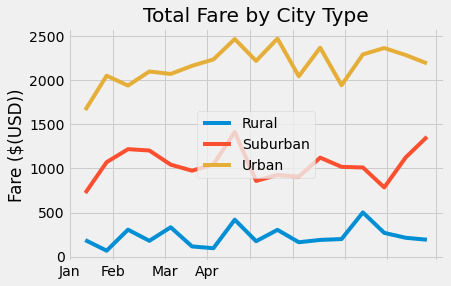

In [51]:
plt.style.use('fivethirtyeight')
import matplotlib.ticker as ticker
import matplotlib.dates as mdates





# Create the plot with ax.plt()

fig, ax = plt.subplots()
group_labels = ['Jan', 'Feb', 'Mar','Apr']
ax.plot(weekly_bins)
ax.set_title('Total Fare by City Type')
ax.set_ylabel('Fare ($(USD))')
#ax.set_xlabel('Weekly Time Frame')
ax.set_xticklabels(group_labels)



plt.legend(['Rural', 'Suburban', 'Urban'], loc='center')
plt.xticks




#ax = weekly_bins.plot()

plt.savefig("analysis/Fig88.png")












